In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset 

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Feature Engineering - Handling missing value

In [5]:
# Checking for missing value
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
# Filling Missing Value

#df = df.fillna(method = 'bfill')
#df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Feature engineering - Label Encoding 

In [8]:
#Label encoding is done to tranform string value into numeric value

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [9]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


<Axes: xlabel='Purchased', ylabel='count'>

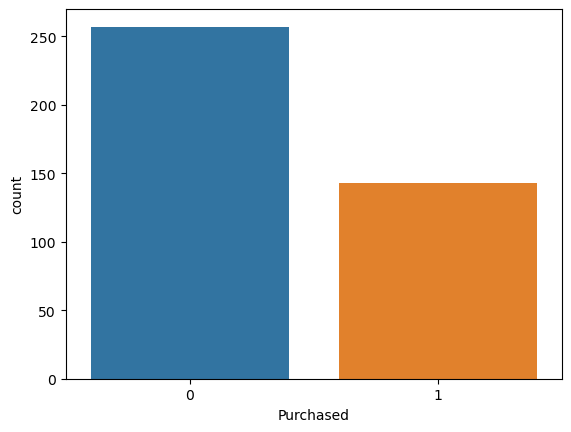

In [10]:
sns.countplot(df,x = 'Purchased')

# Assign X & Y 

In [13]:
df = df.drop('User ID',axis = 1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [15]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

# Split the data in Training and Testing

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.25,random_state = 2)
print('*'*30 + 'Training data' + '*'*30)
print('Training data-X- shape: \t',xtrain.shape)
print()
print('Training data-Y- shape: \t',ytrain.shape)
print()
print('*'*30 + 'Testing data' + '*'*30)
print()
print('Training data-(X-Input)-shape: \t',xtest.shape)
print()
print('Training data-(Y-outcome)-shape: \t',ytest.shape)

******************************Training data******************************
Training data-X- shape: 	 (300, 3)

Training data-Y- shape: 	 (300, 1)

******************************Testing data******************************

Training data-(X-Input)-shape: 	 (100, 3)

Training data-(Y-outcome)-shape: 	 (100, 1)


# Logistic Regression Model

In [18]:
#Calling Logsitic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', verbose =2 )

#Train the model
print('Training the model \n')
log_reg.fit(xtrain,ytrain)

#Testing the model
ypred = log_reg.predict(xtest)
print('Predicted label for the input samples : \n',ypred)
print()
print('Testing competed\n')
print('Testing samples are:\n',len(ypred))

# Performance Measure
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('*'*30 + 'Performance Measures on Logistic Regression Classification' + '*'*30)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred))
print()
print('='*80)

Training the model 

[LibLinear]Predicted label for the input samples : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Testing competed

Testing samples are:
 100
******************************Performance Measures on Logistic Regression Classification******************************
Accuracy score:	
 0.62


Confusion matrix:	
 [[62  0]
 [38  0]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.62      1.00      0.77        62
           1       0.00      0.00      0.00        38

    accuracy                           0.62       100
   macro avg       0.31      0.50      0.38       100
weighted avg       0.38      0.62      0.47       100




C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classifi

# 1. Applying LDA 

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(xtrain, ytrain)

# Transform the training and testing data using LDA
X_train_lda = lda.transform(xtrain)
X_test_lda = lda.transform(xtest)

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
#Calling Logsitic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', verbose =2 )

#Train the model
print('Training the model \n')
log_reg.fit(X_train_lda,ytrain)

#Testing the model
ypred_lda = log_reg.predict(X_test_lda)
print('Predicted label for the input samples : \n',ypred)
print()
print('Testing competed\n')
print('Testing samples are:\n',len(ypred))

# Performance Measure

print('*'*30 + 'Performance Measures on Logistic Regression Classification' + '*'*30)
accuracy_score_lda = accuracy_score(ytest,ypred_lda)
print('Accuracy score:\t\n',accuracy_score_lda)
print()
print('='*80)
print()
confusion_matrix_lda = confusion_matrix(ytest,ypred_lda)
print('Confusion matrix:\t\n',confusion_matrix_lda)
print()
print('='*80)
print()
classification_report_lda = classification_report(ytest,ypred_lda)
print('Classification report is:\t\n',classification_report_lda)
print()
print('='*80)

Training the model 

[LibLinear]Predicted label for the input samples : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Testing competed

Testing samples are:
 100
******************************Performance Measures on Logistic Regression Classification******************************
Accuracy score:	
 0.81


Confusion matrix:	
 [[56  6]
 [13 25]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        62
           1       0.81      0.66      0.72        38

    accuracy                           0.81       100
   macro avg       0.81      0.78      0.79       100
weighted avg       0.81      0.81      0.81       100




C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 2. Perform PCA

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Feature Engineering - Standard Scaler

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)

In [30]:
# Initializing PCA

pca = PCA(n_components=2)  # You can specify the number of components you want to keep
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Logistic Model with PCA

In [34]:
#Calling Logsitic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', verbose =2 )

#Train the model
print('Training the model \n')
log_reg.fit(X_train_pca,ytrain)

#Testing the model
ypred_pca = log_reg.predict(X_test_pca)
print('Predicted label for the input samples : \n',ypred_pca)
print()
print('Testing competed\n')
print('Testing samples are:\n',len(ypred_pca))

# Performance Measure

print('*'*30 + 'Performance Measures on Logistic Regression Classification' + '*'*30)
accuracy_score_pca = accuracy_score(ytest,ypred_pca)
print('Accuracy score:\t\n',accuracy_score_pca)
print()
print('='*80)
print()
confusion_matrix_pca = confusion_matrix(ytest,ypred_pca)
print('Confusion matrix:\t\n',confusion_matrix_pca)
print()
print('='*80)
print()
classification_report_pca = classification_report(ytest,ypred_pca)
print('Classification report is:\t\n',classification_report_pca)
print()
print('='*80)

Training the model 

[LibLinear]Predicted label for the input samples : 
 [0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0]

Testing competed

Testing samples are:
 100
******************************Performance Measures on Logistic Regression Classification******************************
Accuracy score:	
 0.79


Confusion matrix:	
 [[55  7]
 [14 24]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        62
           1       0.77      0.63      0.70        38

    accuracy                           0.79       100
   macro avg       0.79      0.76      0.77       100
weighted avg       0.79      0.79      0.78       100




C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 3. GrindSearch & GrindSearchCV 

In [37]:
# Import necessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be a leaf node
}

# Initialize the Random Forest model
model = RandomForestRegressor()

# Initialize and perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)  # 'cv' is the number of cross-validation folds
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model with the best hyperparameters
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
ypred_gridcv = best_model.predict(xtest)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# 4. Randomizedseachcv

In [39]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter space to search
param_dist = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be a leaf node
}

# Initialize the Random Forest model
model = RandomForestRegressor()

# Initialize and perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)  # 'n_iter' specifies the number of parameter settings to sample
random_search.fit(xtrain, ytrain)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model with the best hyperparameters
best_model = random_search.best_estimator_

# Evaluate the best model on the test data
ypred_random = best_model.predict(xtest)

# You can now use 'best_model' for predictions on new data.


C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}


# 5. Handling imbalance dataset

# Upsample

In [45]:
df_value = df['Purchased'].value_counts()
df_value

0    257
1    143
Name: Purchased, dtype: int64

Majority length:	 257

Minority length:	 143
****************************************************************************************************
     Gender  Age  EstimatedSalary  Purchased
0         1   19            19000          0
1         1   35            20000          0
2         0   26            43000          0
3         0   27            57000          0
4         1   19            76000          0
..      ...  ...              ...        ...
381       1   48            33000          1
287       0   48           138000          1
385       1   56            60000          1
232       1   40           107000          1
391       1   47            23000          1

[514 rows x 4 columns]

Axes(0.125,0.11;0.775x0.77)


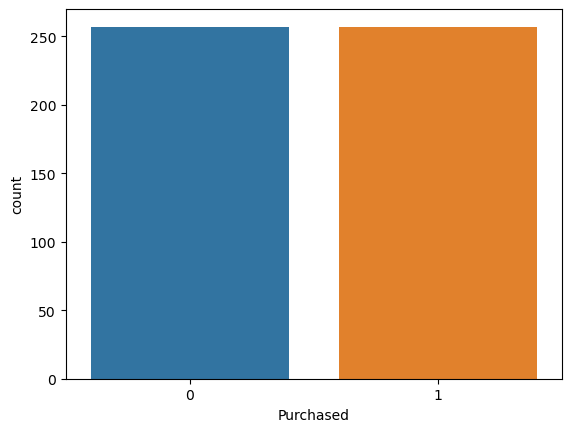

In [46]:
from sklearn.utils import resample

df_majority = df[df.Purchased == 0]
df_minority = df[df.Purchased == 1]

print('Majority length:\t',len(df_majority))
print()
print('Minority length:\t',len(df_minority))
print('*'*100)

#Upsample

df_minority_upsampled = resample(df_minority,
                                 replace = True, # sample with replacement
                                 n_samples = 257, # to match the majority class
                                 random_state = 12
                                )

df_upsample = pd.concat([df_majority,df_minority_upsampled])
print(df_upsample)
print()
print(sns.countplot(df_upsample,x='Purchased'))

In [47]:
df_upsample.shape

(514, 4)

In [48]:
x_up = df_upsample.iloc[:,:-1]
y_up = df_upsample.iloc[:,-1:]

from sklearn.model_selection import train_test_split
xtrain_up,xtest_up,ytrain_up,ytest_up = train_test_split(x_up,y_up,test_size=.25,random_state = 2)
print('*'*30 + 'Training data' + '*'*30)
print('Training data-X- shape: \t',xtrain_up.shape)
print()
print('Training data-Y- shape: \t',ytrain_up.shape)
print()
print('*'*30 + 'Testing data' + '*'*30)
print()
print('Training data-(X-Input)-shape: \t',xtest_up.shape)
print()
print('Training data-(Y-outcome)-shape: \t',ytest_up.shape)

#Calling Logsitic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', verbose =2 )

#Train the model
print('Training the model \n')
log_reg.fit(xtrain_up,ytrain_up)

#Testing the model
ypred_up = log_reg.predict(xtest_up)
print('Predicted label for the input samples : \n',ypred_up)
print()
print('Testing competed\n')
print('Testing samples are:\n',len(ypred_up))


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Performance Measure

print('*'*30 + 'Performance Measures on Logistic Regression Classification' + '*'*30)
accuracy_score_up = accuracy_score(ytest_up,ypred_up)
print('Accuracy score:\t\n',accuracy_score_up)
print()
print('='*80)
print()
confusion_matrix_up = confusion_matrix(ytest_up,ypred_up)
print('Confusion matrix:\t\n',confusion_matrix_up)
print()
print('='*80)
print()
classification_report_up = classification_report(ytest_up,ypred_up)
print('Classification report is:\t\n',classification_report_up)
print()
print('='*80)

******************************Training data******************************
Training data-X- shape: 	 (385, 3)

Training data-Y- shape: 	 (385, 1)

******************************Testing data******************************

Training data-(X-Input)-shape: 	 (129, 3)

Training data-(Y-outcome)-shape: 	 (129, 1)
Training the model 

[LibLinear]Predicted label for the input samples : 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Testing competed

Testing samples are:
 129
******************************Performance Measures on Logistic Regression Classification******************************
Accuracy score:	
 0.5193798449612403


Confusion matrix:	
 [[ 0 62]
 [ 0 67]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.00      

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classifi

# DownSample

Majority length:	 257

Minority length:	 143
****************************************************************************************************
     Gender  Age  EstimatedSalary  Purchased
7         0   32           150000          1
16        1   47            25000          1
17        1   45            26000          1
18        1   46            28000          1
19        0   48            29000          1
..      ...  ...              ...        ...
341       1   35            75000          0
158       1   26            30000          0
135       1   23            63000          0
191       0   19            26000          0
218       0   46            96000          0

[286 rows x 4 columns]

Axes(0.125,0.11;0.775x0.77)


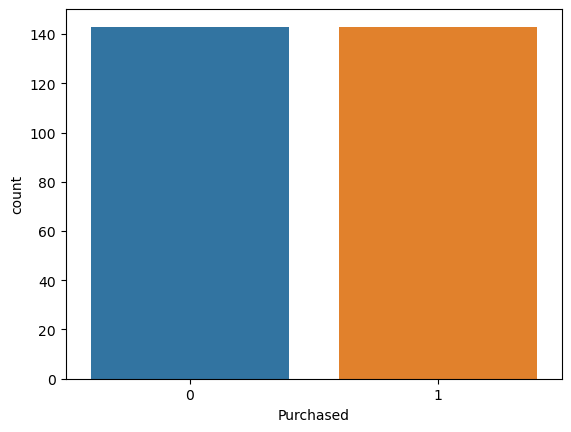

In [50]:
from sklearn.utils import resample

df_majority = df[df.Purchased == 0]
df_minority = df[df.Purchased == 1]

print('Majority length:\t',len(df_majority))
print()
print('Minority length:\t',len(df_minority))
print('*'*100)

#Upsample

df_majority_downsampled = resample(df_majority,
                                 replace = True, # sample with replacement
                                 n_samples = 143, # to match the majority class
                                 random_state = 12
                                )

df_downsample = pd.concat([df_minority,df_majority_downsampled])
print(df_downsample)
print()
print(sns.countplot(df_downsample,x='Purchased'))

In [51]:
df_upsample.shape

(514, 4)

In [52]:
x_down = df_downsample.iloc[:,:-1]
y_down = df_downsample.iloc[:,-1:]

from sklearn.model_selection import train_test_split
xtrain_down,xtest_down,ytrain_down,ytest_down = train_test_split(x_down,y_down,test_size=.25,random_state = 2)
print('*'*30 + 'Training data' + '*'*30)
print('Training data-X- shape: \t',xtrain_down.shape)
print()
print('Training data-Y- shape: \t',ytrain_down.shape)
print()
print('*'*30 + 'Testing data' + '*'*30)
print()
print('Training data-(X-Input)-shape: \t',xtest_down.shape)
print()
print('Training data-(Y-outcome)-shape: \t',ytest_down.shape)

#Calling Logsitic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', verbose =2 )

#Train the model
print('Training the model \n')
log_reg.fit(xtrain_down,ytrain_down)

#Testing the model
ypred_down = log_reg.predict(xtest_down)
print('Predicted label for the input samples : \n',ypred_down)
print()
print('Testing competed\n')
print('Testing samples are:\n',len(ypred_down))


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Performance Measure

print('*'*30 + 'Performance Measures on Logistic Regression Classification' + '*'*30)
accuracy_score_down = accuracy_score(ytest_down,ypred_down)
print('Accuracy score:\t\n',accuracy_score_down)
print()
print('='*80)
print()
confusion_matrix_down = confusion_matrix(ytest_down,ypred_down)
print('Confusion matrix:\t\n',confusion_matrix_down)
print()
print('='*80)
print()
classification_report_down = classification_report(ytest_down,ypred_down)
print('Classification report is:\t\n',classification_report_down)
print()
print('='*80)

******************************Training data******************************
Training data-X- shape: 	 (214, 3)

Training data-Y- shape: 	 (214, 1)

******************************Testing data******************************

Training data-(X-Input)-shape: 	 (72, 3)

Training data-(Y-outcome)-shape: 	 (72, 1)
Training the model 

[LibLinear]Predicted label for the input samples : 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Testing competed

Testing samples are:
 72
******************************Performance Measures on Logistic Regression Classification******************************
Accuracy score:	
 0.5


Confusion matrix:	
 [[ 0 36]
 [ 0 36]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.50      1.00      0.67        36

    accuracy                           0.50        72


C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classifi

# 6. Apply Cross Validation

# K-Cross validation:

In [57]:
# Import necessary libraries

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest model
model = RandomForestRegressor()

# Define the number of folds for K-Fold Cross Validation
n_splits = 5  # You can adjust the number of folds

# Initialize K-Fold Cross Validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# List to store mean squared error for each fold
mse_scores = []

# Perform K-Fold Cross Validation
for train_index, val_index in kf.split(xtrain):
    X_train_fold, X_val_fold = xtrain.iloc[train_index], xtrain.iloc[val_index]
    y_train_fold, y_val_fold = ytrain.iloc[train_index], ytrain.iloc[val_index]

    model.fit(X_train_fold, y_train_fold)
    ypred_kcross = model.predict(X_val_fold)
    mse = mean_squared_error(y_val_fold, ypred_kcross)
    mse_scores.append(mse)


# Calculate and print the average MSE across all folds
average_mse = sum(mse_scores) / len(mse_scores)
print("Average MSE:", average_mse)

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Average MSE: 0.08205599999999999


C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# 7. LOOCV

In [59]:
# Import necessary libraries

from sklearn.model_selection import LeaveOneOut

# Initialize the Random Forest model
model = RandomForestRegressor()

# Initialize Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()

# List to store mean squared error for each iteration
mse_scores = []

# Perform LOOCV
for train_index, test_index in loo.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate and print the average MSE across all iterations
average_mse = sum(mse_scores) / len(mse_scores)
print("Average MSE:", average_mse)


C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Average MSE: 0.08772121689377833
